In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [2]:
# Load data and clean data

In [3]:
page_info=pd.read_csv("1000-page-info.csv")

In [4]:
df=pd.read_csv("user_page_week_likes_201608_201610_add_quality_100000_sample_balanced.csv")
df=df.sort_values(by=['user_id'])
df

user_id          page_id week_start_date  reaction_time  \
5015421        502548149224       7938522410      2016-10-30              0   
5015501        502548149224     113201214447      2016-09-25              0   
2853814        502548149224      18468761129      2016-08-07              1   
5015386        502548149224       5550296508      2016-08-28              0   
5015500        502548149224     113201214447      2016-09-18              0   
...                     ...              ...             ...            ...   
25543482  10212036602018169      10643211755      2016-09-04              0   
25543481  10212036602018169      10643211755      2016-08-28              0   
25543480  10212036602018169      10643211755      2016-08-21              0   
25543493  10212036602018169      24085780715      2016-08-28              0   
25543573  10212036602018169  545775132233909      2016-10-30              0   

          is_politifact_user  fake_posts_count  
5015421                False               0.0  
5015501                False               0.0  
2853814                False               0.0  
5015386                False               0.0  
5015500                False               0.0  
...                      ...               ...  
25543482               False               0.0  
25543481               False               0.0  
25543480               False               0.0  
25543493               False               0.0  
25543573               False               0.0  

[25543574 rows x 6 columns]

In [5]:
df = df.drop(df[df['reaction_time']==0].index)
df = df.drop("is_politifact_user", axis='columns')
df = df.drop("fake_posts_count", axis='columns')
df_20160918 = df.drop(df[df['week_start_date']!='2016-09-18'].index)
df_20160918 = df_20160918.drop("week_start_date", axis='columns')
df_20160918.reset_index(drop=True, inplace=True)
df_20160918

user_id          page_id  reaction_time
0            502548149224      10643211755              1
1            504535781680      19440638720              1
2            504535781680  199098633470668              6
3            511651751124      10513336322              1
4            511972972838       6491828674              1
...                   ...              ...            ...
347591  10211474845295627  341163402640457              1
347592  10211474845295627  138691142964027              1
347593  10211474845295627      86680728811              1
347594  10211474845295627  997108126967413              2
347595  10212036602018169  354522044588660              2

[347596 rows x 3 columns]

In [6]:
df_20160918_add_page_info = df_20160918.merge(right=page_info, right_on='page_id', left_on='page_id')
df_20160918_add_page_info

user_id          page_id  reaction_time         page_name  \
0            502548149224      10643211755              1               NPR   
1            556509309462      10643211755              1               NPR   
2            583950982121      10643211755              1               NPR   
3            620911238315      10643211755              5               NPR   
4            646962740454      10643211755              1               NPR   
...                   ...              ...            ...               ...   
347591  10203774877187514  116849198376359              1  Michael Ausiello   
347592  10204607407239955  116849198376359              1  Michael Ausiello   
347593  10206904497596294  116849198376359              1  Michael Ausiello   
347594  10201179040873127       9583477694              1    Adryenn Ashley   
347595  10204112590510365       9583477694              1    Adryenn Ashley   

                       category    type    type_sub type_issue  fan_count  \
0       Non-Profit Organization   media       radio        NaN    5132848   
1       Non-Profit Organization   media       radio        NaN    5132848   
2       Non-Profit Organization   media       radio        NaN    5132848   
3       Non-Profit Organization   media       radio        NaN    5132848   
4       Non-Profit Organization   media       radio        NaN    5132848   
...                         ...     ...         ...        ...        ...   
347591            Public Figure  figure  journalist        NaN      32020   
347592            Public Figure  figure  journalist        NaN      32020   
347593            Public Figure  figure  journalist        NaN      32020   
347594            Public Figure  figure  journalist        NaN      93109   
347595            Public Figure  figure  journalist        NaN      93109   

        talking_about_count                                  page_url  \
0                   1151976              https://www.facebook.com/NPR   
1                   1151976              https://www.facebook.com/NPR   
2                   1151976              https://www.facebook.com/NPR   
3                   1151976              https://www.facebook.com/NPR   
4                   1151976              https://www.facebook.com/NPR   
...                     ...                                       ...   
347591                 8857  https://www.facebook.com/MichaelAusiello   
347592                 8857  https://www.facebook.com/MichaelAusiello   
347593                 8857  https://www.facebook.com/MichaelAusiello   
347594                10525    https://www.facebook.com/AdryennAshley   
347595                10525    https://www.facebook.com/AdryennAshley   

        total_like  total_comment  total_share   1:07:14  rank_1:7:14  
0           207136          45354        65668  144396.6           70  
1           207136          45354        65668  144396.6           70  
2           207136          45354        65668  144396.6           70  
3           207136          45354        65668  144396.6           70  
4           207136          45354        65668  144396.6           70  
...            ...            ...          ...       ...          ...  
347591         857             49         1678    2469.2          988  
347592         857             49         1678    2469.2          988  
347593         857             49         1678    2469.2          988  
347594        1338           4596          714    4350.6          727  
347595        1338           4596          714    4350.6          727  

[347596 rows x 16 columns]

In [7]:
# draw bipartite graph

In [8]:
def nx_graph_from_pandas_edgelist(df):
    B = nx.Graph()
    for ir in df.itertuples():
      B.add_node(ir[1], bipartite=0)
      B.add_node(ir[4], bipartite=1)
      B.add_edge(ir[1], ir[4], weight=ir[3])
    return B

In [9]:
B = nx_graph_from_pandas_edgelist(df_20160918_add_page_info)
nx.info(B)

C:\Users\Jackyfirst\AppData\Local\Temp\ipykernel_14048\491313857.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(B)


'Graph with 84044 nodes and 347164 edges'

In [10]:
# Find top x reaction_time Pages

In [11]:
df2_20160918 = df_20160918.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20160918 = df2_20160918.sort_values(by='reaction_time', ascending=False)
df2_20160918 = df2_20160918.drop("user_id", axis='columns')
df2_20160918_add_page_info = df2_20160918.merge(right=page_info, right_on='page_id', left_on='page_id')
df2_20160918_add_page_info = df2_20160918_add_page_info.reset_index()
df2_20160918_add_page_info.head(30)

index          page_id  reaction_time                       page_name  \
0       0  346937065399354        24317.0                Occupy Democrats   
1       1      15704546335        24200.0                        Fox News   
2       2     153080620724        15644.0                 Donald J. Trump   
3       3      21785951839        14821.0                            9GAG   
4       4  179035672287016        13715.0                   American News   
5       5  341163402640457        11368.0                         NowThis   
6       6      18468761129        10566.0             The Huffington Post   
7       7      95475020353        10407.0                       Breitbart   
8       8  199098633470668         9783.0                   The LAD Bible   
9       9  205344452828349         9551.0                    George Takei   
10     10  114517875225866         9126.0                   The Other 98%   
11     11      22067606728         8529.0                      Allen West   
12     12  889307941125736         8003.0                 Hillary Clinton   
13     13  226821494115353         7525.0              Nation In Distress   
14     14  107705785934333         7415.0           The Federalist Papers   
15     15       5550296508         6341.0                             CNN   
16     16      86680728811         6212.0                        ABC News   
17     17  112723252096438         6149.0           The Political Insider   
18     18      10643211755         6121.0                             NPR   
19     19      21898300328         6112.0                        BuzzFeed   
20     20  184859785026060         5992.0            Faith Family America   
21     21  219856014723410         5960.0                    D.L. Hughley   
22     22  354522044588660         5822.0                        Upworthy   
23     23  169676909894983         5606.0  Uncle Sam's Misguided Children   
24     24  133961323610549         5485.0      Donald Trump For President   
25     25     177486166274         5335.0                   Being Liberal   
26     26  513813158657249         5325.0                  Mad World News   
27     27  339226922847416         5319.0                     AWM America   
28     28       9124187907         5311.0     U.S. Senator Bernie Sanders   
29     29  799539910084929         5175.0                      Shaun King   

                   category    type    type_sub  type_issue  fan_count  \
0    Political Organization   group         NaN         NaN    3900088   
1     Media/News/Publishing   media          tv         NaN   13329520   
2             Public Figure  figure  politician         NaN   10801785   
3                  App Page  others         NaN         NaN   32155423   
4     Media/News/Publishing   media     website         NaN    5368155   
5        News/Media Website   media     website         NaN    7743317   
6     Media/News/Publishing   media     website         NaN    8200138   
7     Media/News/Publishing   media     website         NaN    2445780   
8     Media/News/Publishing   media     website         NaN   16164893   
9            Actor/Director  figure  journalist         NaN    9856263   
10             Organization   group         NaN  inequality    3088088   
11            Public Figure  figure  politician         NaN    2436623   
12               Politician  figure  politician         NaN    6159021   
13    Media/News/Publishing   media     website         NaN    1649087   
14    Media/News/Publishing   media     website         NaN    2175186   
15    Media/News/Publishing   media          tv         NaN   23414282   
16               TV Network   media          tv         NaN    9108005   
17       News/Media Website   media     website         NaN    2598529   
18  Non-Profit Organization   media       radio         NaN    5132848   
19    Media/News/Publishing   media     website         NaN    8297094   
20    Media/News/Publishing   media     website         NaN   

In [12]:
page_id_20160918 = df2_20160918_add_page_info.page_id.tolist()
page_id_20160918[0:30]

[346937065399354,
 15704546335,
 153080620724,
 21785951839,
 179035672287016,
 341163402640457,
 18468761129,
 95475020353,
 199098633470668,
 205344452828349,
 114517875225866,
 22067606728,
 889307941125736,
 226821494115353,
 107705785934333,
 5550296508,
 86680728811,
 112723252096438,
 10643211755,
 21898300328,
 184859785026060,
 219856014723410,
 354522044588660,
 169676909894983,
 133961323610549,
 177486166274,
 513813158657249,
 339226922847416,
 9124187907,
 799539910084929]

In [13]:
# only analysis top x pages

In [14]:
df3_20160918_add_page_info = df_20160918_add_page_info[df_20160918_add_page_info.page_id.isin(page_id_20160918[0:30])]
df3_20160918_add_page_info.reset_index(drop=True, inplace=True)
df3_20160918_add_page_info

user_id          page_id  reaction_time           page_name  \
0           502548149224      10643211755              1                 NPR   
1           556509309462      10643211755              1                 NPR   
2           583950982121      10643211755              1                 NPR   
3           620911238315      10643211755              5                 NPR   
4           646962740454      10643211755              1                 NPR   
...                  ...              ...            ...                 ...   
99510  10208786804685972  226821494115353              5  Nation In Distress   
99511  10209261894057338  226821494115353              1  Nation In Distress   
99512  10209839541891315  226821494115353              1  Nation In Distress   
99513  10210076675656645  226821494115353              2  Nation In Distress   
99514  10210813284436493  226821494115353              1  Nation In Distress   

                      category   type type_sub type_issue  fan_count  \
0      Non-Profit Organization  media    radio        NaN    5132848   
1      Non-Profit Organization  media    radio        NaN    5132848   
2      Non-Profit Organization  media    radio        NaN    5132848   
3      Non-Profit Organization  media    radio        NaN    5132848   
4      Non-Profit Organization  media    radio        NaN    5132848   
...                        ...    ...      ...        ...        ...   
99510    Media/News/Publishing  media  website        NaN    1649087   
99511    Media/News/Publishing  media  website        NaN    1649087   
99512    Media/News/Publishing  media  website        NaN    1649087   
99513    Media/News/Publishing  media  website        NaN    1649087   
99514    Media/News/Publishing  media  website        NaN    1649087   

       talking_about_count                                   page_url  \
0                  1151976               https://www.facebook.com/NPR   
1                  1151976               https://www.facebook.com/NPR   
2                  1151976               https://www.facebook.com/NPR   
3                  1151976               https://www.facebook.com/NPR   
4                  1151976               https://www.facebook.com/NPR   
...                    ...                                        ...   
99510              3154824  https://www.facebook.com/NationInDistress   
99511              3154824  https://www.facebook.com/NationInDistress   
99512              3154824  https://www.facebook.com/NationInDistress   
99513              3154824  https://www.facebook.com/NationInDistress   
99514              3154824  https://www.facebook.com/NationInDistress   

       total_like  total_comment  total_share   1:07:14  rank_1:7:14  
0          207136          45354        65668  144396.6           70  
1          207136          45354        65668  144396.6           70  
2          207136          45354        65668  144396.6           70  
3          207136          45354        65668  144396.6           70  
4          207136          45354        65668  144396.6           70  
...           ...            ...          ...       ...          ...  
99510       20822           3478         7454   14952.4          370  
99511       20822           3478         7454   14952.4          370  
99512       20822           3478         7454   14952.4          370  
99513       20822           3478         7454   14952.4          370  
99514       20822           3478         7454   14952.4          370  

[99515 rows x 16 columns]

In [15]:
# graph visualization

In [16]:
B_20160918 = nx_graph_from_pandas_edgelist(df3_20160918_add_page_info)
nx.info(B_20160918)

C:\Users\Jackyfirst\AppData\Local\Temp\ipykernel_14048\3359723739.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(B_20160918)


'Graph with 54395 nodes and 99515 edges'

In [17]:
bottom_nodes, top_nodes = bipartite.sets(B_20160918)

In [18]:
list(top_nodes)

['Allen West',
 'Hillary Clinton',
 "Uncle Sam's Misguided Children",
 'Faith Family America',
 'American News',
 'George Takei',
 'Shaun King',
 'CNN',
 'Fox News',
 'Upworthy',
 'ABC News',
 'Occupy Democrats',
 '9GAG',
 'Breitbart',
 'AWM America',
 'Mad World News',
 'The Political Insider',
 'Donald J. Trump',
 'The Federalist Papers',
 'NPR',
 'NowThis',
 'U.S. Senator Bernie Sanders',
 'D.L. Hughley',
 'The Huffington Post',
 'The Other 98%',
 'Donald Trump For President',
 'The LAD Bible',
 'Being Liberal',
 'BuzzFeed',
 'Nation In Distress']

In [19]:
# Project users' nodes on pages' node

In [20]:
G_20160918 = bipartite.weighted_projected_graph(B_20160918, list(top_nodes), ratio=True)
G_20160918

In [21]:
for u, v, d in G_20160918.edges(data=True):
    d['weight'] = round(d['weight'], 4) 
list(G_20160918.edges(data=True))

[('Allen West', 'The Federalist Papers', {'weight': 0.01}),
 ('Allen West', 'Hillary Clinton', {'weight': 0.0001}),
 ('Allen West', "Uncle Sam's Misguided Children", {'weight': 0.0046}),
 ('Allen West', 'NPR', {'weight': 0.0002}),
 ('Allen West', 'Faith Family America', {'weight': 0.0054}),
 ('Allen West', 'NowThis', {'weight': 0.0022}),
 ('Allen West', 'U.S. Senator Bernie Sanders', {'weight': 0.0004}),
 ('Allen West', 'D.L. Hughley', {'weight': 0.0002}),
 ('Allen West', 'American News', {'weight': 0.0106}),
 ('Allen West', 'The Huffington Post', {'weight': 0.0003}),
 ('Allen West', 'George Takei', {'weight': 0.0006}),
 ('Allen West', 'CNN', {'weight': 0.0012}),
 ('Allen West', 'Shaun King', {'weight': 0.0}),
 ('Allen West', 'The Other 98%', {'weight': 0.0003}),
 ('Allen West', 'Donald Trump For President', {'weight': 0.0054}),
 ('Allen West', 'Fox News', {'weight': 0.0191}),
 ('Allen West', 'The LAD Bible', {'weight': 0.0007}),
 ('Allen West', 'ABC News', {'weight': 0.0021}),
 ('Alle

In [22]:
# Calculate average weight

In [23]:
weight_sum = 0
node_sum = 0
average_weight = 0
for u, v, d in G_20160918.edges(data=True):
    weight_sum += d['weight']
    node_sum += 1
average_weight = weight_sum / node_sum
average_weight 

0.003605080831408769

In [24]:
elarge = [(u, v) for (u, v, d) in G_20160918.edges(data=True) if d["weight"] > average_weight ]
esmall = [(u, v) for (u, v, d) in G_20160918.edges(data=True) if d["weight"] <= average_weight ]

pos = nx.spring_layout(G_20160918, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_20160918, pos, node_size=60)

# edges
nx.draw_networkx_edges(G_20160918, pos, edgelist=elarge, width=2, edge_color="red")
nx.draw_networkx_edges(
    G_20160918, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="black", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_20160918, pos, font_size=15, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_20160918, "weight")
#nx.draw_networkx_edge_labels(G_20160918, pos, edge_labels, font_size=6, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.001)
plt.axis("off")
plt.tight_layout()
plt.gcf().subplots_adjust(left=0)
plt.gcf().subplots_adjust(right=2)
plt.gcf().subplots_adjust(top=2)
plt.gcf().subplots_adjust(bottom=0)
plt.show()

In [25]:
#2016-09-25
# Load data and clean data
df_20160925 = df.drop(df[df['week_start_date']!='2016-09-25'].index)
df_20160925 = df_20160925.drop("week_start_date", axis='columns')
df_20160925.reset_index(drop=True, inplace=True)

df_20160925_add_page_info = df_20160925.merge(right=page_info, right_on='page_id', left_on='page_id')


## Find top x reaction_time Pages
df2_20160925 = df_20160925_add_page_info.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20160925 = df2_20160925.sort_values(by='reaction_time', ascending=False)
df2_20160925 = df2_20160925.reset_index()
page_id_20160925 = df2_20160925.page_id.tolist()


## only analysis top x pages
df3_20160925_add_page_info = df_20160925_add_page_info[df_20160925_add_page_info.page_id.isin(page_id_20160925[0:30])]
df3_20160925_add_page_info.reset_index(drop=True, inplace=True)


# graph visualization
B_20160925 = nx_graph_from_pandas_edgelist(df3_20160925_add_page_info)
bottom_nodes, top_nodes = bipartite.sets(B_20160925)

# Project users' nodes on pages' node
G_20160925 = bipartite.weighted_projected_graph(B_20160925, list(top_nodes), ratio=True)
for u, v, d in G_20160925.edges(data=True):
    d['weight'] = round(d['weight'], 4) 

# Calculate average weight
weight_sum = 0
node_sum = 0
average_weight = 0
for u, v, d in G_20160925.edges(data=True):
    weight_sum += d['weight']
    node_sum += 1
average_weight = weight_sum / node_sum

elarge = [(u, v) for (u, v, d) in G_20160925.edges(data=True) if d["weight"] > average_weight ]
esmall = [(u, v) for (u, v, d) in G_20160925.edges(data=True) if d["weight"] <= average_weight ]

pos = nx.spring_layout(G_20160925, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_20160925, pos, node_size=60)

# edges
nx.draw_networkx_edges(G_20160925, pos, edgelist=elarge, width=2, edge_color="red")
nx.draw_networkx_edges(
    G_20160925, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="black", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_20160925, pos, font_size=15, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_20160925, "weight")
#nx.draw_networkx_edge_labels(G_20160925, pos, edge_labels, font_size=6, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.001)
plt.axis("off")
plt.tight_layout()
plt.gcf().subplots_adjust(left=0)
plt.gcf().subplots_adjust(right=2)
plt.gcf().subplots_adjust(top=2)
plt.gcf().subplots_adjust(bottom=0)
plt.show()

In [26]:
for u, v, d in G_20160925.edges(data=True):
    d['weight'] = round(d['weight'], 4) 
list(G_20160925.edges(data=True))

[('Allen West', 'Sean Hannity', {'weight': 0.0108}),
 ('Allen West', 'The Federalist Papers', {'weight': 0.0099}),
 ('Allen West', 'The New York Times', {'weight': 0.0001}),
 ('Allen West', 'Hillary Clinton', {'weight': 0.0001}),
 ('Allen West', "Uncle Sam's Misguided Children", {'weight': 0.0053}),
 ('Allen West', 'NPR', {'weight': 0.0002}),
 ('Allen West', 'Faith Family America', {'weight': 0.0074}),
 ('Allen West', 'Bill Maher', {'weight': 0.0002}),
 ('Allen West', 'NowThis', {'weight': 0.0008}),
 ('Allen West', 'American News', {'weight': 0.0075}),
 ('Allen West', 'Bernie Sanders', {'weight': 0.0001}),
 ('Allen West', 'The Huffington Post', {'weight': 0.0004}),
 ('Allen West', 'George Takei', {'weight': 0.0007}),
 ('Allen West', 'CNN', {'weight': 0.0007}),
 ('Allen West', 'The Other 98%', {'weight': 0.0008}),
 ('Allen West', 'Donald Trump For President', {'weight': 0.0084}),
 ('Allen West', 'Fox News', {'weight': 0.0207}),
 ('Allen West', 'Right Wing News', {'weight': 0.0081}),
 ('

In [27]:
# Find top x reaction_time Pages
df2_20160925 = df_20160925.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20160925 = df2_20160925.sort_values(by='reaction_time', ascending=False)
df2_20160925 = df2_20160925.drop("user_id", axis='columns')
df2_20160925_add_page_info = df2_20160925.merge(right=page_info, right_on='page_id', left_on='page_id')
df2_20160925_add_page_info = df2_20160925_add_page_info.reset_index()
df2_20160925_add_page_info.head(30)

index          page_id  reaction_time                       page_name  \
0       0  346937065399354        36650.0                Occupy Democrats   
1       1      15704546335        26754.0                        Fox News   
2       2     153080620724        23879.0                 Donald J. Trump   
3       3  889307941125736        21235.0                 Hillary Clinton   
4       4      18468761129        15244.0             The Huffington Post   
5       5      21785951839        14219.0                            9GAG   
6       6  114517875225866        11853.0                   The Other 98%   
7       7  205344452828349        10776.0                    George Takei   
8       8      62507427296        10344.0                      Bill Maher   
9       9      95475020353        10218.0                       Breitbart   
10     10  133961323610549        10163.0      Donald Trump For President   
11     11  226821494115353         9993.0              Nation In Distress   
12     12  199098633470668         9519.0                   The LAD Bible   
13     13      22067606728         8506.0                      Allen West   
14     14      21898300328         8210.0                        BuzzFeed   
15     15  184859785026060         7811.0            Faith Family America   
16     16  179035672287016         7602.0                   American News   
17     17  107705785934333         7337.0           The Federalist Papers   
18     18       5281959998         7216.0              The New York Times   
19     19  339226922847416         7133.0                     AWM America   
20     20       5550296508         6689.0                             CNN   
21     21      69813760388         6645.0                    Sean Hannity   
22     22      10643211755         6505.0                             NPR   
23     23  389658314427637         6342.0                 Right Wing News   
24     24     177486166274         6213.0                   Being Liberal   
25     25  169676909894983         6029.0  Uncle Sam's Misguided Children   
26     26  341163402640457         5978.0                         NowThis   
27     27  112723252096438         5759.0           The Political Insider   
28     28  124955570892789         5286.0                  Bernie Sanders   
29     29  354522044588660         5094.0                        Upworthy   

                   category    type    type_sub  type_issue  fan_count  \
0    Political Organization   group         NaN         NaN    3900088   
1     Media/News/Publishing   media          tv         NaN   13329520   
2             Public Figure  figure  politician         NaN   10801785   
3                Politician  figure  politician         NaN    6159021   
4     Media/News/Publishing   media     website         NaN    8200138   
5                  App Page  others         NaN         NaN   32155423   
6              Organization   group         NaN  inequality    3088088   
7            Actor/Director  figure  journalist         NaN    9856263   
8             Public Figure  figure  journalist         NaN    3476448   
9     Media/News/Publishing   media     website         NaN    2445780   
10               Politician  figure  politician         NaN    1633254   
11    Media/News/Publishing   media     website         NaN    1649087   
12    Media/News/Publishing   media     website         NaN   16164893   
13            Public Figure  figure  politician         NaN    2436623   
14    Media/News/Publishing   media     website         NaN    8297094   
15    Media/News/Publishing   media     website         NaN    3537582   
16    Media/News/Publishing   media     website         NaN    5368155   
17    Media/News/Publishing   media     website         NaN    2175186   
18    Media/News/Publishing   media   newspaper         NaN   11959098   
19       News/Media Website   media     website         NaN    6161533   
20    Media/News/Publishing   media          tv         NaN   

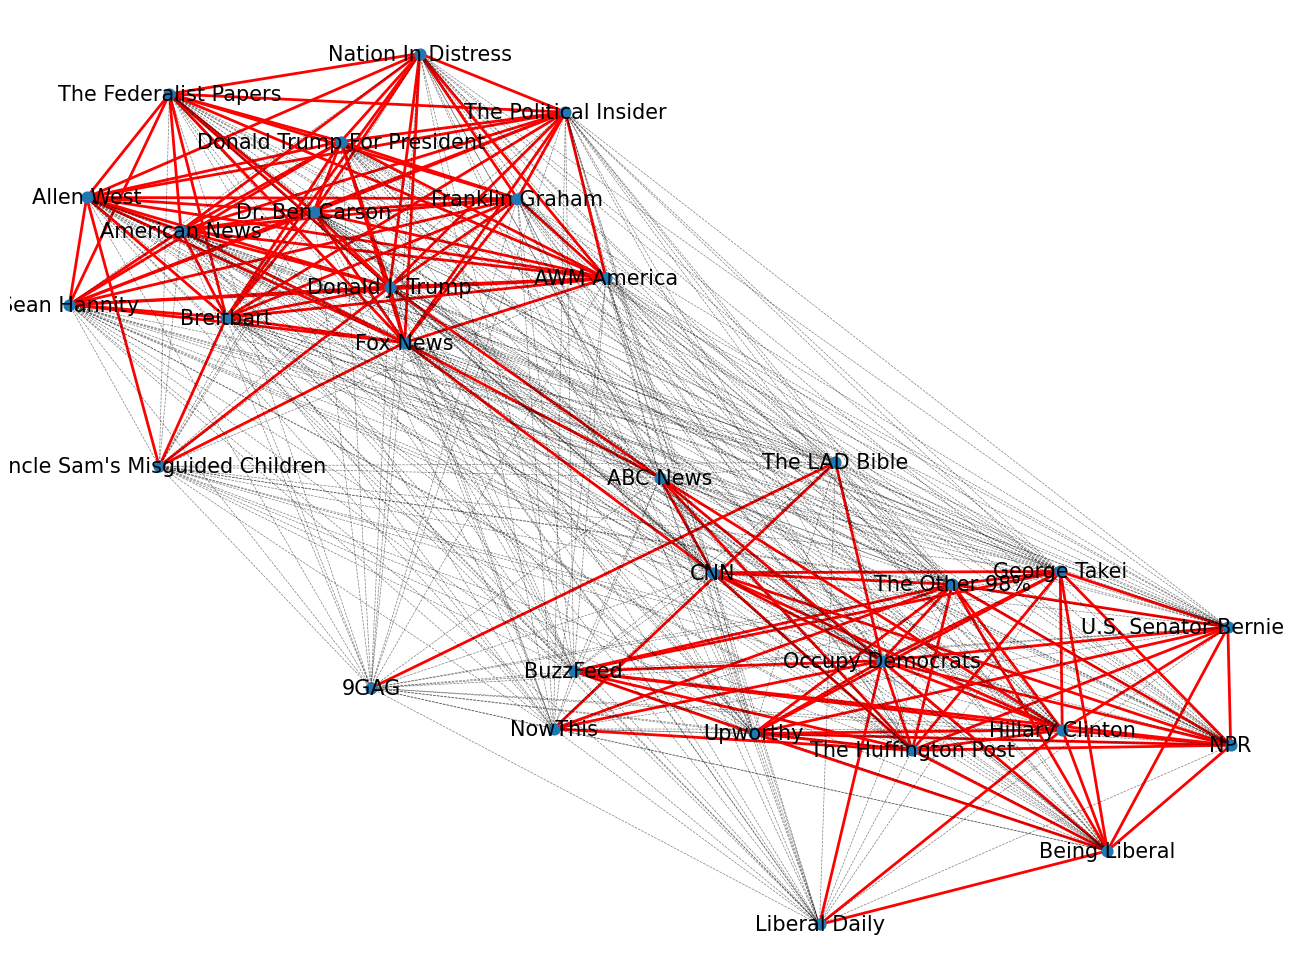

In [28]:
#2016-10-02
# Load data and clean data
df_20161002 = df.drop(df[df['week_start_date']!='2016-10-02'].index)
df_20161002 = df_20161002.drop("week_start_date", axis='columns')
df_20161002.reset_index(drop=True, inplace=True)

df_20161002_add_page_info = df_20161002.merge(right=page_info, right_on='page_id', left_on='page_id')


## Find top x reaction_time Pages
df2_20161002 = df_20161002_add_page_info.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161002 = df2_20161002.sort_values(by='reaction_time', ascending=False)
df2_20161002 = df2_20161002.reset_index()
page_id_20161002 = df2_20161002.page_id.tolist()


## only analysis top x pages
df3_20161002_add_page_info = df_20161002_add_page_info[df_20161002_add_page_info.page_id.isin(page_id_20161002[0:30])]
df3_20161002_add_page_info.reset_index(drop=True, inplace=True)


# graph visualization
B_20161002 = nx_graph_from_pandas_edgelist(df3_20161002_add_page_info)
bottom_nodes, top_nodes = bipartite.sets(B_20161002)

# Project users' nodes on pages' node
G_20161002 = bipartite.weighted_projected_graph(B_20161002, list(top_nodes), ratio=True)
for u, v, d in G_20161002.edges(data=True):
    d['weight'] = round(d['weight'], 4) 

# Calculate average weight
weight_sum = 0
node_sum = 0
average_weight = 0
for u, v, d in G_20161002.edges(data=True):
    weight_sum += d['weight']
    node_sum += 1
average_weight = weight_sum / node_sum

elarge = [(u, v) for (u, v, d) in G_20161002.edges(data=True) if d["weight"] > average_weight ]
esmall = [(u, v) for (u, v, d) in G_20161002.edges(data=True) if d["weight"] <= average_weight ]

pos = nx.spring_layout(G_20161002, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_20161002, pos, node_size=60)

# edges
nx.draw_networkx_edges(G_20161002, pos, edgelist=elarge, width=2, edge_color="red")
nx.draw_networkx_edges(
    G_20161002, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="black", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_20161002, pos, font_size=15, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_20161002, "weight")
#nx.draw_networkx_edge_labels(G_20161002, pos, edge_labels, font_size=6, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.001)
plt.axis("off")
plt.tight_layout()
plt.gcf().subplots_adjust(left=0)
plt.gcf().subplots_adjust(right=2)
plt.gcf().subplots_adjust(top=2)
plt.gcf().subplots_adjust(bottom=0)
plt.show()

In [29]:
for u, v, d in G_20161002.edges(data=True):
    d['weight'] = round(d['weight'], 4) 
list(G_20161002.edges(data=True))

[('Allen West', 'Sean Hannity', {'weight': 0.0132}),
 ('Allen West', 'The Federalist Papers', {'weight': 0.0091}),
 ('Allen West', 'Franklin Graham', {'weight': 0.0088}),
 ('Allen West', 'Hillary Clinton', {'weight': 0.0001}),
 ('Allen West', "Uncle Sam's Misguided Children", {'weight': 0.0047}),
 ('Allen West', 'NPR', {'weight': 0.0001}),
 ('Allen West', 'NowThis', {'weight': 0.0009}),
 ('Allen West', 'U.S. Senator Bernie Sanders', {'weight': 0.0003}),
 ('Allen West', 'American News', {'weight': 0.007}),
 ('Allen West', 'The Huffington Post', {'weight': 0.0004}),
 ('Allen West', 'George Takei', {'weight': 0.0006}),
 ('Allen West', 'CNN', {'weight': 0.0011}),
 ('Allen West', 'The Other 98%', {'weight': 0.0004}),
 ('Allen West', 'Donald Trump For President', {'weight': 0.0102}),
 ('Allen West', 'Liberal Daily', {'weight': 0.0}),
 ('Allen West', 'Fox News', {'weight': 0.0194}),
 ('Allen West', 'The LAD Bible', {'weight': 0.0007}),
 ('Allen West', 'ABC News', {'weight': 0.0015}),
 ('Allen

In [30]:
# Find top x reaction_time Pages
df2_20161002 = df_20161002.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161002 = df2_20161002.sort_values(by='reaction_time', ascending=False)
df2_20161002 = df2_20161002.drop("user_id", axis='columns')
df2_20161002_add_page_info = df2_20161002.merge(right=page_info, right_on='page_id', left_on='page_id')
df2_20161002_add_page_info = df2_20161002_add_page_info.reset_index()
df2_20161002_add_page_info.head(30)

index          page_id  reaction_time                       page_name  \
0       0  346937065399354        36016.0                Occupy Democrats   
1       1     153080620724        28853.0                 Donald J. Trump   
2       2      15704546335        23138.0                        Fox News   
3       3      21785951839        17731.0                            9GAG   
4       4  133961323610549        13977.0      Donald Trump For President   
5       5      95475020353        13072.0                       Breitbart   
6       6      18468761129        12716.0             The Huffington Post   
7       7  889307941125736        12526.0                 Hillary Clinton   
8       8  114517875225866        11845.0                   The Other 98%   
9       9  205344452828349        10151.0                    George Takei   
10     10  199098633470668        10082.0                   The LAD Bible   
11     11      22067606728         9125.0                      Allen West   
12     12  226821494115353         8731.0              Nation In Distress   
13     13      69813760388         7063.0                    Sean Hannity   
14     14      10643211755         6987.0                             NPR   
15     15  131201286936061         6857.0                 Franklin Graham   
16     16  179035672287016         6729.0                   American News   
17     17     177486166274         6686.0                   Being Liberal   
18     18       5550296508         6388.0                             CNN   
19     19       9124187907         6066.0     U.S. Senator Bernie Sanders   
20     20      86680728811         6054.0                        ABC News   
21     21  138691142964027         6031.0                  Dr. Ben Carson   
22     22  339226922847416         6004.0                     AWM America   
23     23  107705785934333         5719.0           The Federalist Papers   
24     24  169676909894983         5588.0  Uncle Sam's Misguided Children   
25     25  112723252096438         5511.0           The Political Insider   
26     26      21898300328         5427.0                        BuzzFeed   
27     27  341163402640457         5188.0                         NowThis   
28     28  354522044588660         5100.0                        Upworthy   
29     29  610045389164725         4895.0                   Liberal Daily   

                   category    type    type_sub  type_issue  fan_count  \
0    Political Organization   group         NaN         NaN    3900088   
1             Public Figure  figure  politician         NaN   10801785   
2     Media/News/Publishing   media          tv         NaN   13329520   
3                  App Page  others         NaN         NaN   32155423   
4                Politician  figure  politician         NaN    1633254   
5     Media/News/Publishing   media     website         NaN    2445780   
6     Media/News/Publishing   media     website         NaN    8200138   
7                Politician  figure  politician         NaN    6159021   
8              Organization   group         NaN  inequality    3088088   
9            Actor/Director  figure  journalist         NaN    9856263   
10    Media/News/Publishing   media     website         NaN   16164893   
11            Public Figure  figure  politician         NaN    2436623   
12    Media/News/Publishing   media     website         NaN    1649087   
13            Public Figure  figure  journalist         NaN    2460455   
14  Non-Profit Organization   media       radio         NaN    5132848   
15            Public Figure  figure  journalist         NaN    4473335   
16    Media/News/Publishing   media     website         NaN    5368155   
17    Media/News/Publishing   media     website         NaN    1499325   
18    Media/News/Publishing   media          tv         NaN   23414282   
19               Politician  figure  politician         NaN    4269815   
20               TV Network   media          tv         NaN   

In [31]:
#2016-10-09
# Load data and clean data
df_20161009 = df.drop(df[df['week_start_date']!='2016-10-09'].index)
df_20161009 = df_20161009.drop("week_start_date", axis='columns')
df_20161009.reset_index(drop=True, inplace=True)

df_20161009_add_page_info = df_20161009.merge(right=page_info, right_on='page_id', left_on='page_id')


## Find top x reaction_time Pages
df2_20161009 = df_20161009_add_page_info.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161009 = df2_20161009.sort_values(by='reaction_time', ascending=False)
df2_20161009 = df2_20161009.reset_index()
page_id_20161009 = df2_20161009.page_id.tolist()


## only analysis top x pages
df3_20161009_add_page_info = df_20161009_add_page_info[df_20161009_add_page_info.page_id.isin(page_id_20161009[0:30])]
df3_20161009_add_page_info.reset_index(drop=True, inplace=True)


# graph visualization
B_20161009 = nx_graph_from_pandas_edgelist(df3_20161009_add_page_info)
bottom_nodes, top_nodes = bipartite.sets(B_20161009)

# Project users' nodes on pages' node
G_20161009 = bipartite.weighted_projected_graph(B_20161009, list(top_nodes), ratio=True)
for u, v, d in G_20161009.edges(data=True):
    d['weight'] = round(d['weight'], 4) 

# Calculate average weight
weight_sum = 0
node_sum = 0
average_weight = 0
for u, v, d in G_20161009.edges(data=True):
    weight_sum += d['weight']
    node_sum += 1
average_weight = weight_sum / node_sum

elarge = [(u, v) for (u, v, d) in G_20161009.edges(data=True) if d["weight"] > average_weight ]
esmall = [(u, v) for (u, v, d) in G_20161009.edges(data=True) if d["weight"] <= average_weight ]

pos = nx.spring_layout(G_20161009, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_20161009, pos, node_size=60)

# edges
nx.draw_networkx_edges(G_20161009, pos, edgelist=elarge, width=2, edge_color="red")
nx.draw_networkx_edges(
    G_20161009, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="black", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_20161009, pos, font_size=15, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_20161009, "weight")
#nx.draw_networkx_edge_labels(G_20161009, pos, edge_labels, font_size=6, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.001)
plt.axis("off")
plt.tight_layout()
plt.gcf().subplots_adjust(left=0)
plt.gcf().subplots_adjust(right=2)
plt.gcf().subplots_adjust(top=2)
plt.gcf().subplots_adjust(bottom=0)
plt.show()

In [32]:
for u, v, d in G_20161009.edges(data=True):
    d['weight'] = round(d['weight'], 4) 
list(G_20161009.edges(data=True))

[('Allen West', 'Sean Hannity', {'weight': 0.0134}),
 ('Allen West', 'The Federalist Papers', {'weight': 0.0115}),
 ('Allen West', 'Franklin Graham', {'weight': 0.0093}),
 ('Allen West', 'The New York Times', {'weight': 0.0002}),
 ('Allen West', 'Hillary Clinton', {'weight': 0.0}),
 ('Allen West', "Uncle Sam's Misguided Children", {'weight': 0.0051}),
 ('Allen West', 'NPR', {'weight': 0.0002}),
 ('Allen West', 'NowThis', {'weight': 0.0007}),
 ('Allen West', 'U.S. Senator Bernie Sanders', {'weight': 0.0002}),
 ('Allen West', 'The Onion', {'weight': 0.0003}),
 ('Allen West', 'American News', {'weight': 0.0095}),
 ('Allen West', 'The Huffington Post', {'weight': 0.0003}),
 ('Allen West', 'George Takei', {'weight': 0.0005}),
 ('Allen West', 'CNN', {'weight': 0.0012}),
 ('Allen West', 'The Other 98%', {'weight': 0.0004}),
 ('Allen West', 'Donald Trump For President', {'weight': 0.0101}),
 ('Allen West', 'Western Journalism', {'weight': 0.0082}),
 ('Allen West', 'Fox News', {'weight': 0.0271

In [33]:
# Find top x reaction_time Pages
df2_20161009 = df_20161009.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161009 = df2_20161009.sort_values(by='reaction_time', ascending=False)
df2_20161009 = df2_20161009.drop("user_id", axis='columns')
df2_20161009_add_page_info = df2_20161009.merge(right=page_info, right_on='page_id', left_on='page_id')
df2_20161009_add_page_info = df2_20161009_add_page_info.reset_index()
df2_20161009_add_page_info.head(30)

index          page_id  reaction_time                       page_name  \
0       0  346937065399354        49460.0                Occupy Democrats   
1       1     153080620724        42136.0                 Donald J. Trump   
2       2      15704546335        34740.0                        Fox News   
3       3      95475020353        18809.0                       Breitbart   
4       4  889307941125736        15569.0                 Hillary Clinton   
5       5      18468761129        13831.0             The Huffington Post   
6       6      21785951839        13682.0                            9GAG   
7       7  133961323610549        13672.0      Donald Trump For President   
8       8  179035672287016        11918.0                   American News   
9       9  114517875225866        11575.0                   The Other 98%   
10     10      22067606728        11565.0                      Allen West   
11     11  205344452828349        10323.0                    George Takei   
12     12  199098633470668         9859.0                   The LAD Bible   
13     13      69813760388         8909.0                    Sean Hannity   
14     14     177486166274         8667.0                   Being Liberal   
15     15  107705785934333         8460.0           The Federalist Papers   
16     16  354522044588660         8153.0                        Upworthy   
17     17      10643211755         8126.0                             NPR   
18     18  226821494115353         8100.0              Nation In Distress   
19     19       5550296508         7949.0                             CNN   
20     20      86680728811         7764.0                        ABC News   
21     21  112723252096438         7636.0           The Political Insider   
22     22       5281959998         7260.0              The New York Times   
23     23      21898300328         7067.0                        BuzzFeed   
24     24       9124187907         6608.0     U.S. Senator Bernie Sanders   
25     25      20950654496         6430.0                       The Onion   
26     26  169676909894983         6393.0  Uncle Sam's Misguided Children   
27     27  131201286936061         6227.0                 Franklin Graham   
28     28     123624513983         6213.0              Western Journalism   
29     29  341163402640457         6176.0                         NowThis   

                   category    type    type_sub  type_issue  fan_count  \
0    Political Organization   group         NaN         NaN    3900088   
1             Public Figure  figure  politician         NaN   10801785   
2     Media/News/Publishing   media          tv         NaN   13329520   
3     Media/News/Publishing   media     website         NaN    2445780   
4                Politician  figure  politician         NaN    6159021   
5     Media/News/Publishing   media     website         NaN    8200138   
6                  App Page  others         NaN         NaN   32155423   
7                Politician  figure  politician         NaN    1633254   
8     Media/News/Publishing   media     website         NaN    5368155   
9              Organization   group         NaN  inequality    3088088   
10            Public Figure  figure  politician         NaN    2436623   
11           Actor/Director  figure  journalist         NaN    9856263   
12    Media/News/Publishing   media     website         NaN   16164893   
13            Public Figure  figure  journalist         NaN    2460455   
14    Media/News/Publishing   media     website         NaN    1499325   
15    Media/News/Publishing   media     website         NaN    2175186   
16    Media/News/Publishing   media     website         NaN   10028666   
17  Non-Profit Organization   media       radio         NaN    5132848   
18    Media/News/Publishing   media     website         NaN    1649087   
19    Media/News/Publishing   media          tv         NaN   23414282   
20               TV Network   media          tv         NaN   

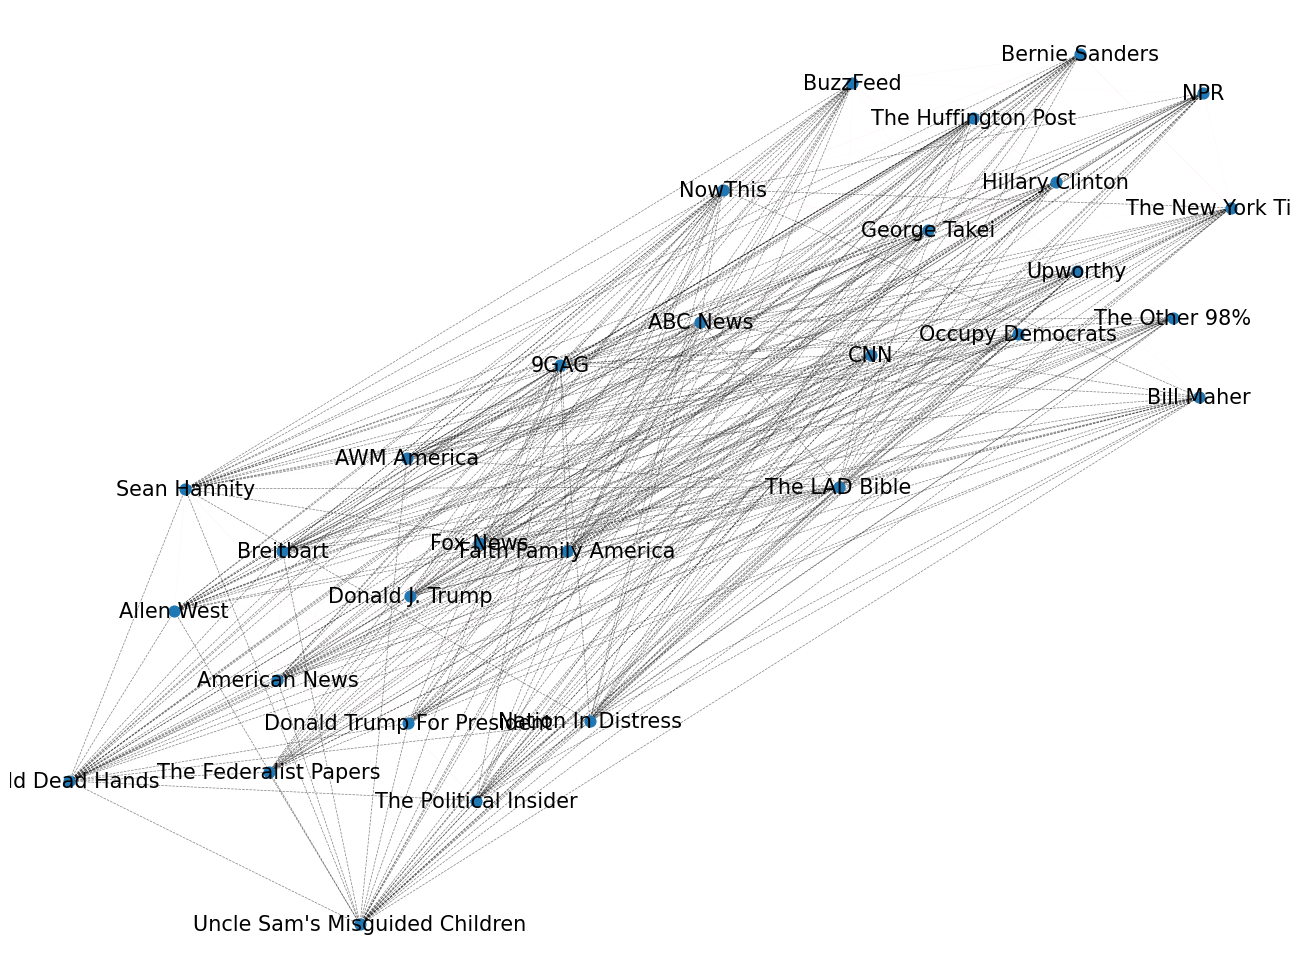

In [39]:
#2016-10-16
# Load data and clean data
df_20161016 = df.drop(df[df['week_start_date']!='2016-10-16'].index)
df_20161016 = df_20161016.drop("week_start_date", axis='columns')
df_20161016.reset_index(drop=True, inplace=True)

df_20161016_add_page_info = df_20161016.merge(right=page_info, right_on='page_id', left_on='page_id')


## Find top x reaction_time Pages
df2_20161016 = df_20161016_add_page_info.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161016 = df2_20161016.sort_values(by='reaction_time', ascending=False)
df2_20161016 = df2_20161016.reset_index()
page_id_20161016 = df2_20161016.page_id.tolist()


## only analysis top x pages
df3_20161016_add_page_info = df_20161016_add_page_info[df_20161016_add_page_info.page_id.isin(page_id_20161016[0:30])]
df3_20161016_add_page_info.reset_index(drop=True, inplace=True)


# graph visualization
B_20161016 = nx_graph_from_pandas_edgelist(df3_20161016_add_page_info)
bottom_nodes, top_nodes = bipartite.sets(B_20161016)

# Project users' nodes on pages' node
G_20161016 = bipartite.weighted_projected_graph(B_20161016, list(top_nodes), ratio=True)
for u, v, d in G_20161016.edges(data=True):
    d['weight'] = round(d['weight'], 4) 

# Calculate average weight
weight_sum = 0
node_sum = 0
average_weight = 0
for u, v, d in G_20161016.edges(data=True):
    weight_sum += d['weight']
    node_sum += 1
average_weight = weight_sum / node_sum

elarge = [(u, v) for (u, v, d) in G_20161016.edges(data=True) if d["weight"] > average_weight ]
esmall = [(u, v) for (u, v, d) in G_20161016.edges(data=True) if d["weight"] <= average_weight ]

pos = nx.spring_layout(G_20161016, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G_20161016, pos, node_size=60)

# edges
nx.draw_networkx_edges(G_20161016, pos, edgelist=elarge, width=2, edge_color="red")
nx.draw_networkx_edges(
    G_20161016, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="black", style="dashed"
)

# node labels
nx.draw_networkx_labels(G_20161016, pos, font_size=15, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_20161016, "weight")
#nx.draw_networkx_edge_labels(G_20161016, pos, edge_labels, font_size=6, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.001)
plt.axis("off")
plt.tight_layout()
plt.gcf().subplots_adjust(left=0)
plt.gcf().subplots_adjust(right=2)
plt.gcf().subplots_adjust(top=2)
plt.gcf().subplots_adjust(bottom=0)
plt.show()

In [35]:
for u, v, d in G_20161016.edges(data=True):
    d['weight'] = round(d['weight'], 4) 
list(G_20161016.edges(data=True))

[('Allen West', 'Sean Hannity', {'weight': 0.0128}),
 ('Allen West', 'The Federalist Papers', {'weight': 0.011}),
 ('Allen West', 'The New York Times', {'weight': 0.0001}),
 ('Allen West', 'Hillary Clinton', {'weight': 0.0002}),
 ('Allen West', "Uncle Sam's Misguided Children", {'weight': 0.0045}),
 ('Allen West', 'NPR', {'weight': 0.0002}),
 ('Allen West', 'Faith Family America', {'weight': 0.0052}),
 ('Allen West', 'Bill Maher', {'weight': 0.0001}),
 ('Allen West', 'NowThis', {'weight': 0.0009}),
 ('Allen West', 'Cold Dead Hands', {'weight': 0.0042}),
 ('Allen West', 'American News', {'weight': 0.0087}),
 ('Allen West', 'Bernie Sanders', {'weight': 0.0001}),
 ('Allen West', 'The Huffington Post', {'weight': 0.0003}),
 ('Allen West', 'George Takei', {'weight': 0.0005}),
 ('Allen West', 'CNN', {'weight': 0.0012}),
 ('Allen West', 'The Other 98%', {'weight': 0.0002}),
 ('Allen West', 'Donald Trump For President', {'weight': 0.0085}),
 ('Allen West', 'Fox News', {'weight': 0.022}),
 ('Al

In [36]:
# Find top x reaction_time Pages
df2_20161016 = df_20161016.groupby(by=['page_id']).sum().groupby(level=[0]).cumsum()
df2_20161016 = df2_20161016.sort_values(by='reaction_time', ascending=False)
df2_20161016 = df2_20161016.drop("user_id", axis='columns')
df2_20161016_add_page_info = df2_20161016.merge(right=page_info, right_on='page_id', left_on='page_id')
df2_20161016_add_page_info = df2_20161016_add_page_info.reset_index()
df2_20161016_add_page_info.head(30)

index          page_id  reaction_time                       page_name  \
0       0     153080620724        32051.0                 Donald J. Trump   
1       1  346937065399354        30202.0                Occupy Democrats   
2       2      15704546335        28509.0                        Fox News   
3       3      95475020353        17025.0                       Breitbart   
4       4  889307941125736        16012.0                 Hillary Clinton   
5       5      21785951839        15136.0                            9GAG   
6       6  133961323610549        14286.0      Donald Trump For President   
7       7  199098633470668        12449.0                   The LAD Bible   
8       8  205344452828349        12253.0                    George Takei   
9       9      18468761129        12221.0             The Huffington Post   
10     10  226821494115353        10188.0              Nation In Distress   
11     11      22067606728         9878.0                      Allen West   
12     12       5550296508         9550.0                             CNN   
13     13  114517875225866         9366.0                   The Other 98%   
14     14      21898300328         8868.0                        BuzzFeed   
15     15  107705785934333         8517.0           The Federalist Papers   
16     16  179035672287016         8455.0                   American News   
17     17      69813760388         8356.0                    Sean Hannity   
18     18       5281959998         7934.0              The New York Times   
19     19      62507427296         7864.0                      Bill Maher   
20     20  112723252096438         7299.0           The Political Insider   
21     21  124955570892789         7028.0                  Bernie Sanders   
22     22      10643211755         6816.0                             NPR   
23     23  169676909894983         6765.0  Uncle Sam's Misguided Children   
24     24  339226922847416         6668.0                     AWM America   
25     25      86680728811         6150.0                        ABC News   
26     26  341163402640457         6110.0                         NowThis   
27     27  354522044588660         6004.0                        Upworthy   
28     28  307188559330028         5399.0                 Cold Dead Hands   
29     29  184859785026060         5359.0            Faith Family America   

                   category    type    type_sub  type_issue  fan_count  \
0             Public Figure  figure  politician         NaN   10801785   
1    Political Organization   group         NaN         NaN    3900088   
2     Media/News/Publishing   media          tv         NaN   13329520   
3     Media/News/Publishing   media     website         NaN    2445780   
4                Politician  figure  politician         NaN    6159021   
5                  App Page  others         NaN         NaN   32155423   
6                Politician  figure  politician         NaN    1633254   
7     Media/News/Publishing   media     website         NaN   16164893   
8            Actor/Director  figure  journalist         NaN    9856263   
9     Media/News/Publishing   media     website         NaN    8200138   
10    Media/News/Publishing   media     website         NaN    1649087   
11            Public Figure  figure  politician         NaN    2436623   
12    Media/News/Publishing   media          tv         NaN   23414282   
13             Organization   group         NaN  inequality    3088088   
14    Media/News/Publishing   media     website         NaN    8297094   
15    Media/News/Publishing   media     website         NaN    2175186   
16    Media/News/Publishing   media     website         NaN    5368155   
17            Public Figure  figure  journalist         NaN    2460455   
18    Media/News/Publishing   media   newspaper         NaN   11959098   
19            Public Figure  figure  journalist         NaN    3476448   
20       News/Media Website   media     website         NaN   